## Introduction

Anemia is a blood disorder of not having enough healthy red blood cells or hemoglobin to carry oxygen to the body's tissues. It can often serve as a warning sign for underlying health conditions, making early diagnosis crucial. By exploring the hematological changes associated with anemia, we can better understand its causes, improve diagnostic accuracy, and develop more effective treatment strategies for patients.

This project builds upon the foundational work of [Mojumdar et al., 2025](https://pmc.ncbi.nlm.nih.gov/articles/PMC11699093), which used traditional statistical methods like Chi-Square tests and T-tests to explore associations between biological factors and anemia. Building on these insights, our goal is to apply machine learning techniques to uncover more complex, non-linear relationships in the data. By doing so, we aim to enhance diagnostic accuracy and provide deeper insights into the factors influencing anemia. Additionally, we plan to create a simple interactive web application that allows users to input hematological parameters and receive a diagnosis prediction, making the analysis more accessible to a broader audience.

What makes this project particularly unique is the collaboration with **[Dr. Gem Wu](https://scholar.google.com.tw/citations?user=MwIr5fMAAAAJ&hl=en)**, a **hematologist** working at **Chang Gung Memorial Hospital, Taiwan**. With **[Dr. Gem Wu](https://scholar.google.com.tw/citations?user=MwIr5fMAAAAJ&hl=en)** providing expert support on the hematological aspects of anemia, I have been able to incorporate expert insights into the hematological aspects of anemia, ensuring that our analysis is grounded in medical realities and clinical perspectives. This collaboration enhances the accuracy and relevance of our findings, bridging the gap between data science and clinical expertise.

Ultimately, this project seeks to bridge the gap between traditional statistical analysis and modern machine learning, offering both deeper insights into anemia and a practical, interactive tool that can help improve early diagnosis and patient care.

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

This notebook is based on the dataset collected from anemia patients at Aalok Healthcare Ltd., located in Dhaka, Bangladesh on 9th October 2023. The direct URL to the dataset is https://data.mendeley.com/datasets/y7v7ff3wpj/1.

This dataset includes clinical and hematological parameters from pediatric Anemia patients. It is designed to support the development of predictive models, aiding in the early diagnosis and personalized management of Anemia. This dataset will be beneficial for research in hematology, pediatric care, and healthcare prediction modeling.

Dataset Content: Hematological parameters from anemia patients

Healthcare Provider: Alok Healthcare Ltd., Dhaka, Bangladesh

Patient Demographics:

**Sex:** Male/Female

**Age:** Age of each patient

Key Hematological Parameters:

**Hemoglobin Level (`Hb`):** Measurement of the blood’s capacity to carry oxygen

**Red Blood Cell (`RBC`) Count:** CBC test measures RBC count and other blood parameters, assessing the role of the lungs in transporting oxygen and carbon dioxide

**Packed Cell Volume (`PCV`):** The measurement of red blood cell proportion to the total blood volume

**Mean Corpuscular Volume (`MCV`):** Overall size of red blood cells

**Mean Corpuscular Hemoglobin (`MCH`):** The average hemoglobin content in red blood cells

**Mean Corpuscular Hemoglobin Concentration (`MCHC`):** Deﬁne the color internsity of red blood cells

This dataset is a valuable starting point for examining how age, gender, and other hematological variables, such as hemoglobin levels and red blood cell indices, inﬂuence anemia-related health risks. It offers a unique opportunity to track health disparities and compare
how age affects anemia risk alongside other hematological parameters, only a few comprehensive datasets record the full hematological proﬁle of anemic patients. Additionally, gender-speciﬁc measures of anemia enhance the understanding of demographic-related risks and support research into tailored intervention strategies. By exploring the relationships between
hematological parameters and risk levels, this dataset facilitates the development of targeted strategies for effective anemia detection.

## Blood Indicators Analysis and Their Clinical Significance

To better understand anemia, it’s important to know the key blood indicators involved, based on insights from the MSD Manuals article on [Evaluation of Anemia](https://www.msdmanuals.com/professional/hematology-and-oncology/approach-to-the-patient-with-anemia/evaluation-of-anemia):

Anemia is a decrease in the number of red blood cells (RBCs) as measured by the red cell count, the hematocrit, or the red cell hemoglobin content.

In **adult males**, anemia is defined as any of the following:

- Hemoglobin < 13.6 g/dL (< 1360 g/L)

- Hematocrit (also called Packed Cell Volume, or PCV) < 40% (< 0.40)

- RBC < 4.5 million/mcL (< 4.5 × $10^{12}$/L)

In **adult females**, anemia is defined as any of the following:

- Hemoglobin < 12 g/dL (< 120 g/L)

- Hematocrit (PCV) < 37% (< 0.37)

- RBC < 4 million/mcL (< 4 × $10^{12}$/L)

Measuring hemoglobin levels, RBC count and hematocrit regularly is important for a thorough anemia treatment ensuring better insights into its intensity and the body’s ability to transport oxygen. **`Hb` and `RBC` are reported as key markers of anemia**.

However, anemia is not a disease itself, but rather a symptom of an underlying condition. Therefore, even mild or asymptomatic anemia should be investigated to determine the cause and treat the underlying issue.

To diagnose anemia, a **Complete Blood Count (CBC)** test is commonly used. This test measures several important factors, including:

- Hemoglobin (the protein that carries oxygen in RBCs)
- RBC count (the number of red blood cells)
- WBC (white blood cell) count
- Platelet count

In addition, RBC indices include:

- **`MCV` (Mean Corpuscular Volume)**, which shows the average size of RBCs. If MCV is less than 80 fL, RBCs are small (microcytic), and if MCV is more than 100 fL, they are large (macrocytic). Large numbers of reticulocytes (immature RBCs) can also raise the MCV because they are larger than mature RBCs.
- **`MCH` (Mean Corpuscular Hemoglobin)** measures the average amount of hemoglobin in each RBC, though it is not commonly used in diagnosis.
- **`MCHC` (Mean Corpuscular Hemoglobin Concentration)** measures the concentration of hemoglobin in each RBC.

By looking at these indicators, doctors can understand the type and cause of anemia, helping them provide the right treatment and care.

## Data Preprocessing

In [72]:
# Load the dataset
df = pd.read_excel("./dataset/Anemia Dataset.xlsx")
print(df)

    Gender  Age    Hb   RBC   PCV   MCV   MCH  MCHC  Decision_Class
0        f   32  10.9  4.26  34.2  80.2  25.5  31.8               1
1        f   45   9.6  3.64  29.9  82.1  26.4  32.2               1
2        f   38  10.1  3.70  32.4  87.6  27.4  31.3               1
3        m   37  11.0  3.93  33.6  85.3  27.9  32.7               1
4        f   50  12.1  4.16  36.5  87.9  29.2  33.2               0
..     ...  ...   ...   ...   ...   ...   ...   ...             ...
995      f   32  10.4  4.49  28.4  63.2  21.2  33.5               1
996      m   48  13.7  4.37  37.8  86.6  31.4  36.2               0
997      m   19  12.1  4.17  33.5  80.4  28.9  36.0               0
998      f   35  12.2  4.28  33.5  78.4  28.6  36.5               0
999      f   25  10.8  4.19  35.0  83.6  29.7  35.5               1

[1000 rows x 9 columns]


In [74]:
df.describe()

,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,40.956000,11.568400,4.133810,32.65240,79.22000,28.143400,35.427000,0.641000
std,16.019322,1.336715,0.599695,4.85723,7.77521,3.340107,1.418162,0.479947
min,18.000000,5.500000,1.470000,10.60000,29.60000,13.300000,25.300000,0.000000
25%,28.000000,10.800000,3.767500,29.80000,75.20000,26.400000,34.900000,0.000000
50%,38.000000,11.600000,4.110000,32.80000,80.70000,28.700000,35.700000,1.000000
75%,51.250000,12.200000,4.460000,35.62500,84.42500,30.400000,36.300000,1.000000
max,96.000000,15.800000,7.410000,49.50000,104.90000,37.900000,38.100000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Hb              1000 non-null   float64
 3   RBC             1000 non-null   float64
 4   PCV             1000 non-null   float64
 5   MCV             1000 non-null   float64
 6   MCH             1000 non-null   float64
 7   MCHC            1000 non-null   float64
 8   Decision_Class  1000 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 70.4+ KB


In [10]:
df.isnull().sum()

Gender            0
Age               0
Hb                0
RBC               0
PCV               0
MCV               0
MCH               0
MCHC              0
Decision_Class    0
dtype: int64

## Data Visualization

In [12]:
# Adjust the name of the values to visualize
df_plot = df.copy() # Avoid modifying the original data
df_plot["Gender"] = df_plot["Gender"].replace({"f": "Female", "m": "Male"})
df_plot["Decision_Class"] = df_plot["Decision_Class"].replace({1: "Anemic", 0: "Non Anemic"})

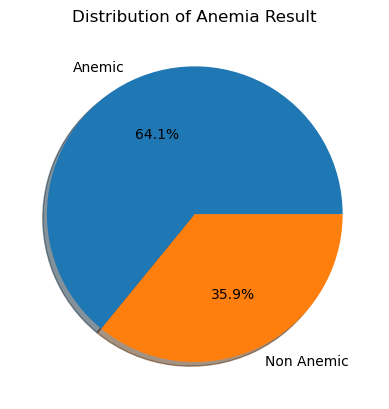

In [13]:
# Create a pie chart of the distribution of anemia result
result_counts = df_plot['Decision_Class'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', shadow="True")
plt.title('Distribution of Anemia Result')
plt.show()

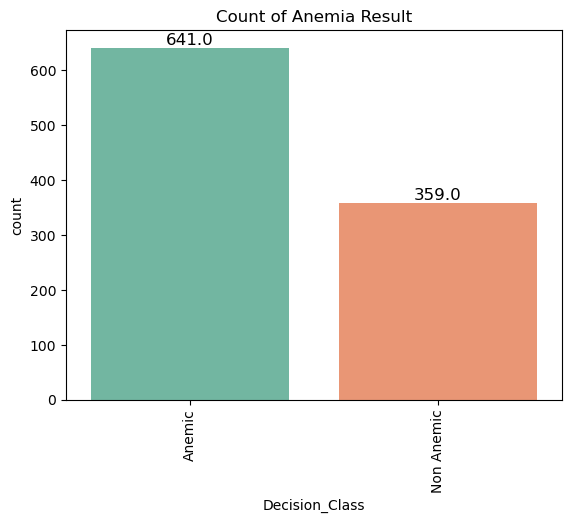

In [14]:
# Create count plot for anemia result
ax = sns.countplot(data=df_plot, x="Decision_Class", hue="Decision_Class", palette='Set2', legend=False)
plt.title('Count of Anemia Result')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  

# Rotate the plot
plt.xticks(rotation=90)
plt.show()

In [15]:
# Count the number of occurrences of each unique value in the 'Decision_Class' column
result_counts = df_plot['Decision_Class'].value_counts()
print(result_counts)

# Check if the two categories are balanced or not
if result_counts.iloc[0] == result_counts.iloc[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')

print("-----------------------------------")

Decision_Class
Anemic        641
Non Anemic    359
Name: count, dtype: int64
The two categories are not balanced.
-----------------------------------


We can see here the 2 categories are not balanced, these imbalanced classes could lead to the bias towards the majority class and not perform well on the minority one. It would affect on building machine learning models, since the most of the class are Anemic, it could lead us to the errors or overfit. 

But we'll try to handle class balance before training and testing the models on the next part.

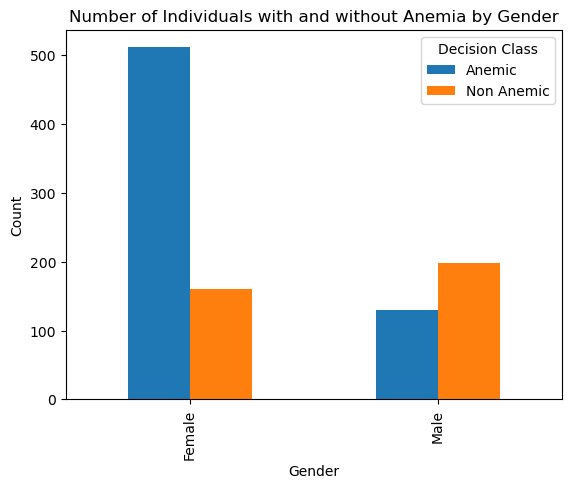

In [17]:
# Create a bar plot
count_data = pd.crosstab(df_plot['Gender'], df_plot['Decision_Class'])
ax = count_data.plot(kind='bar', stacked=False)
plt.title('Number of Individuals with and without Anemia by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Decision Class')

# Ensure all spines (left, right, top, bottom) are visible
for spine in ax.spines.values():
    spine.set_visible(True)

# Show the plot
plt.show()

The visualization clearly illustrates that women tend to be anemic more than men with significantly high numbers.

However, according to the article of [Mojumdar et al., 2025](https://pmc.ncbi.nlm.nih.gov/articles/PMC11699093/#bib0007), the result shows that while **`Gender`** *does not significantly affect diagnostic outcomes*, it has a **strong influence on hemoglobin levels**, indicating that gender affects hemoglobin levels. I will use this finding to inform my machine learning model, where gender will be included as a key feature to predict hemoglobin levels. Given the significant p-values found in both the Z-test and T-test, gender’s effect on hemoglobin levels should be reflected in the model’s predictions. Furthermore, I will evaluate the model’s performance *with* and *without* gender as a feature to assess its predictive importance.

<Figure size 800x500 with 0 Axes>

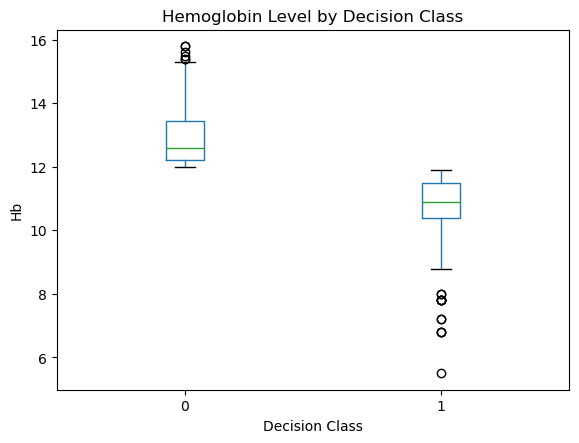

In [19]:
# Box plot for Hemoglobin Level and Decision Class
plt.figure(figsize=(8, 5))
df.boxplot(column='Hb', by='Decision_Class', grid=False, patch_artist=False)
plt.title('Hemoglobin Level by Decision Class')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Decision Class')
plt.ylabel('Hb')
plt.show()

<Figure size 800x500 with 0 Axes>

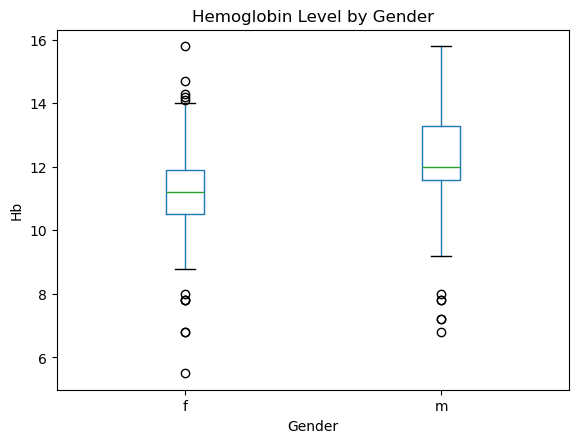

In [20]:
# Box plot for Hemoglobin Level by Gender
plt.figure(figsize=(8, 5))
df.boxplot(column='Hb', by='Gender', grid=False, patch_artist=False)
plt.title('Hemoglobin Level by Gender')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Gender')
plt.ylabel('Hb')
plt.show()

<Figure size 800x500 with 0 Axes>

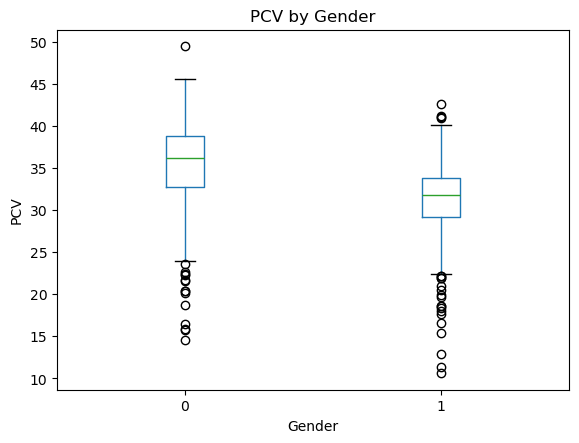

In [84]:
# Box plot for PCV Level by Gender
plt.figure(figsize=(8, 5))
df.boxplot(column='PCV', by='Gender', grid=False, patch_artist=False)
plt.title('PCV by Gender')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Gender')
plt.ylabel('PCV')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
numeric_features = ['Age', 'Hb', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC']
linear_model = LinearRegression()
X_linear = df[numeric_features]
y_linear = df['Decision_Class']
linear_model.fit(X_linear, y_linear)

y_pred_linear = linear_model.predict(X_linear)
print("Linear Regression Analysis")
print("Mean Squared Error:", mean_squared_error(y_linear, y_pred_linear))
print("R-squared Score:", r2_score(y_linear, y_pred_linear))

Linear Regression Analysis
Mean Squared Error: 0.09156744378986849
R-squared Score: 0.602086556130226


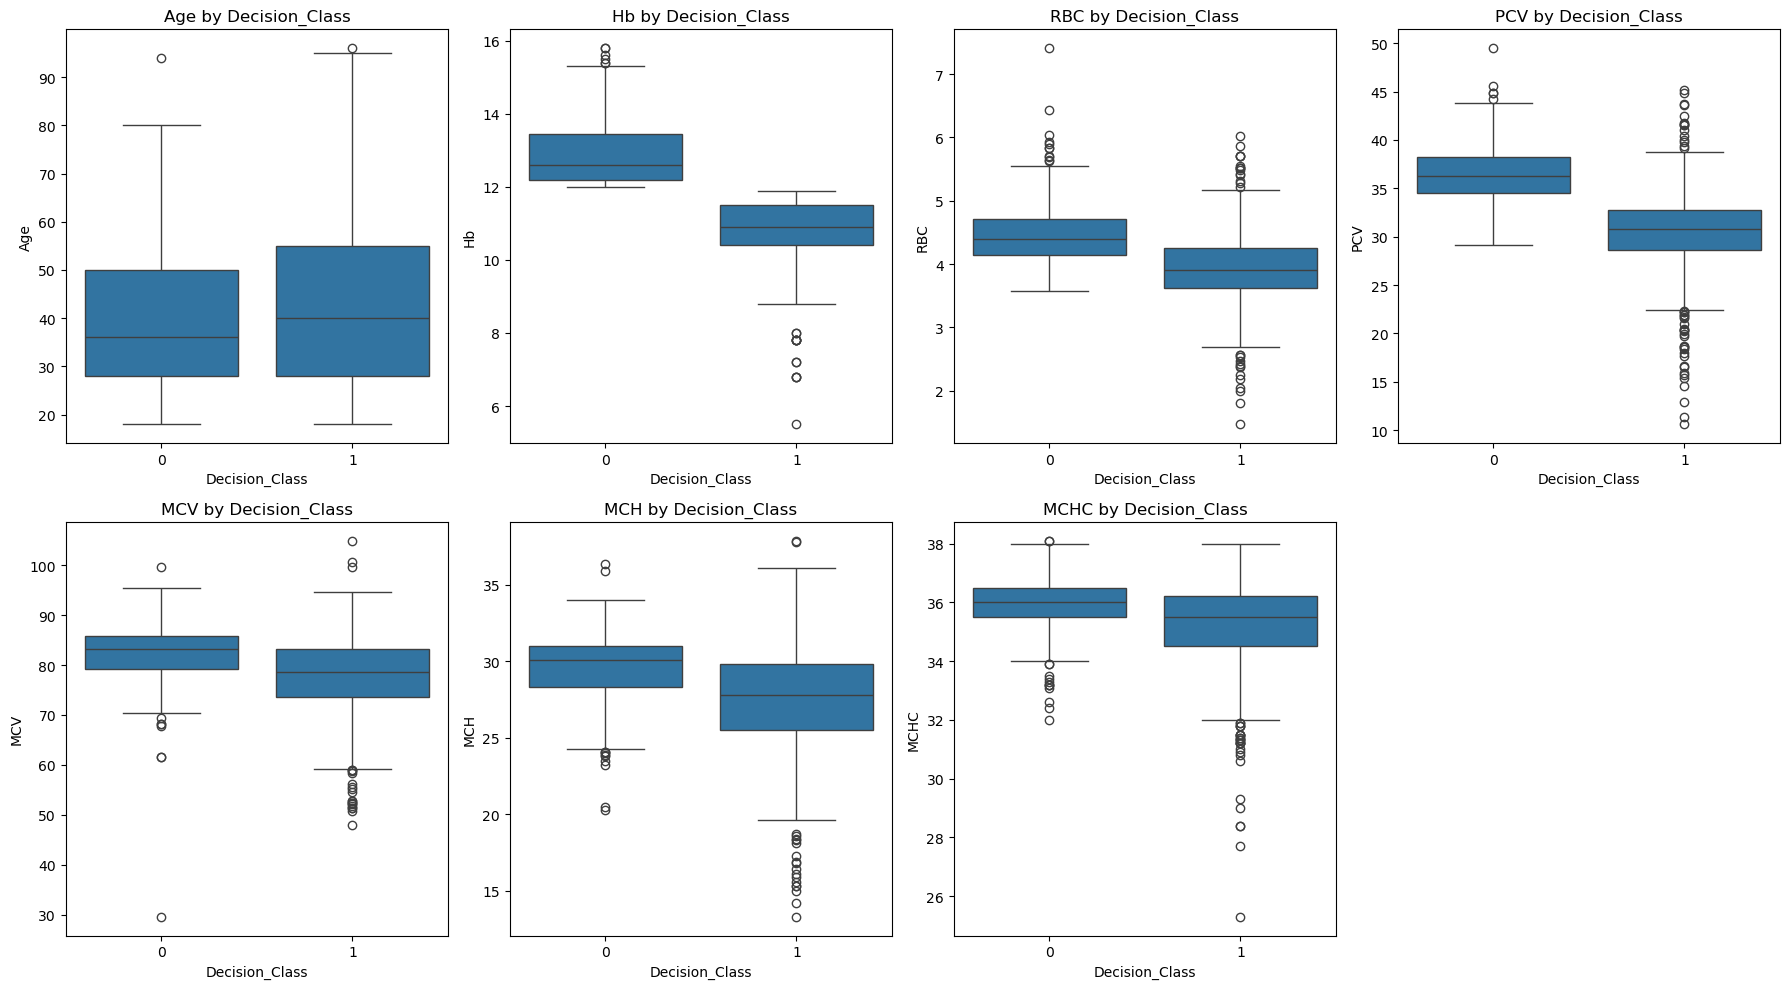

In [23]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x='Decision_Class', y=feature)
    plt.title(f'{feature} by Decision_Class')
plt.tight_layout()
plt.show()

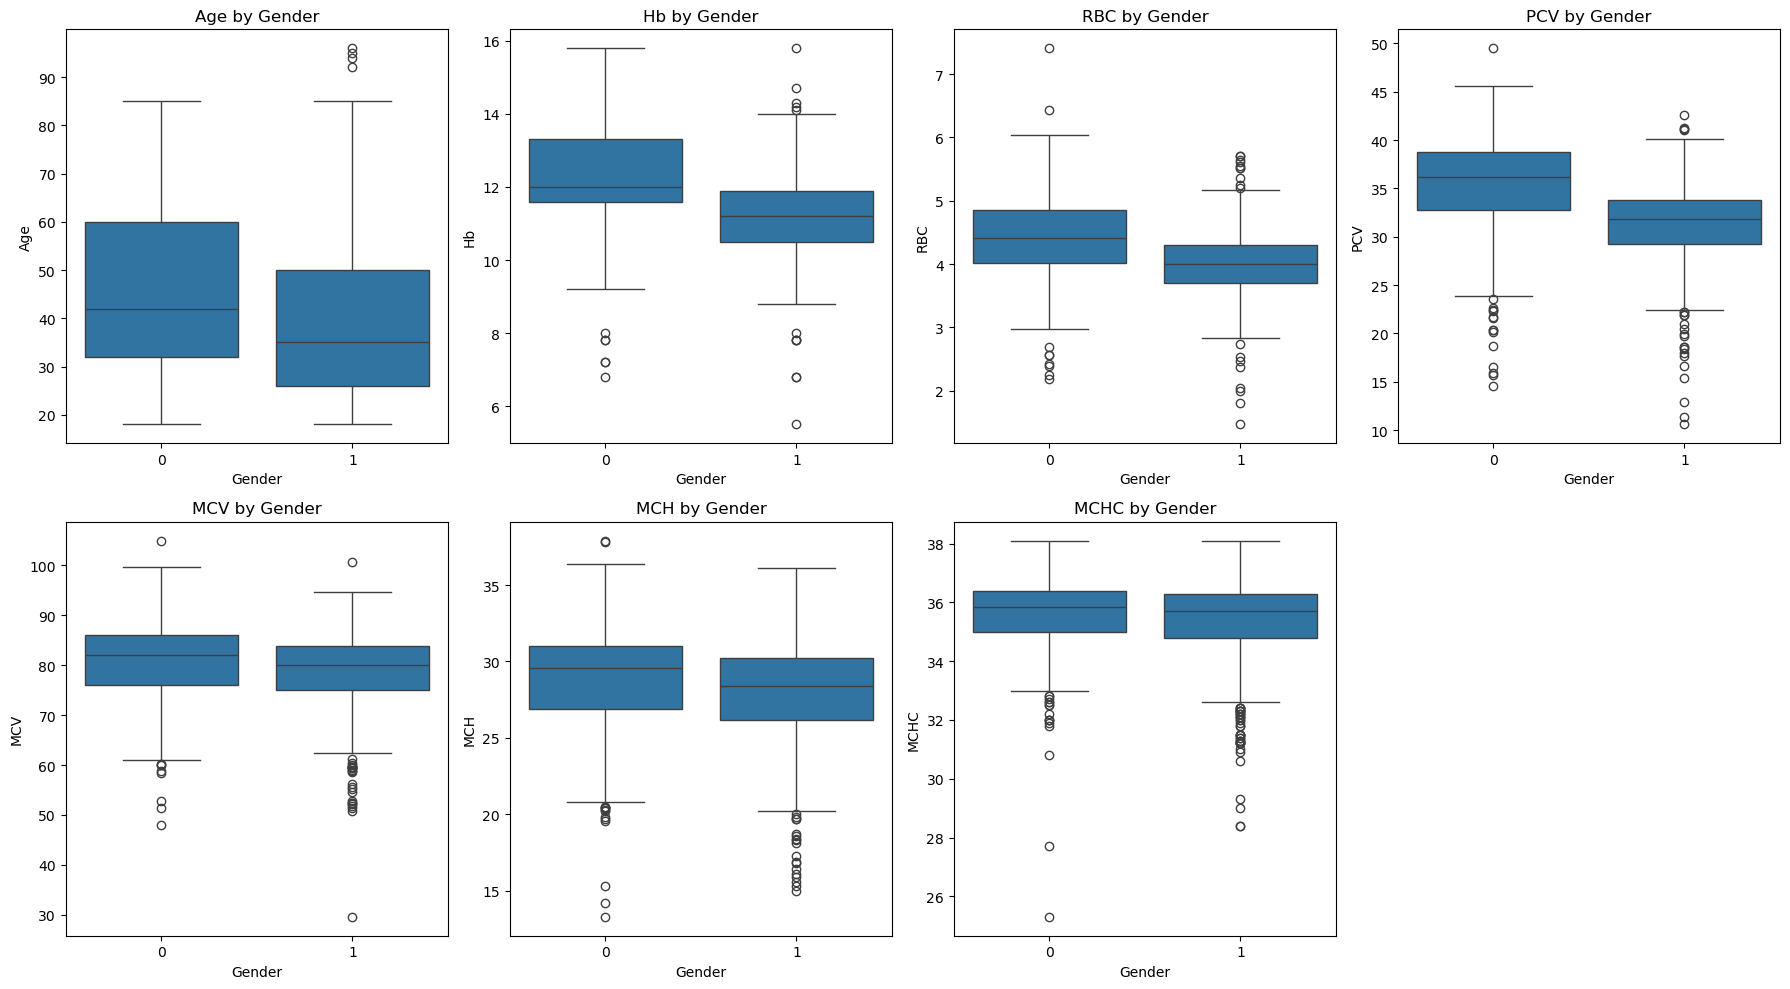

In [90]:
df["Gender"] = df["Gender"].replace({"m": 0, "f": 1})
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x='Gender', y=feature)
    plt.title(f'{feature} by Gender')
plt.tight_layout()
plt.show()

Most blood parameters show similar distributions between genders, with minor differences observed in `Age` and `PCV`. These visualizations highlight how hematological values differ between genders.

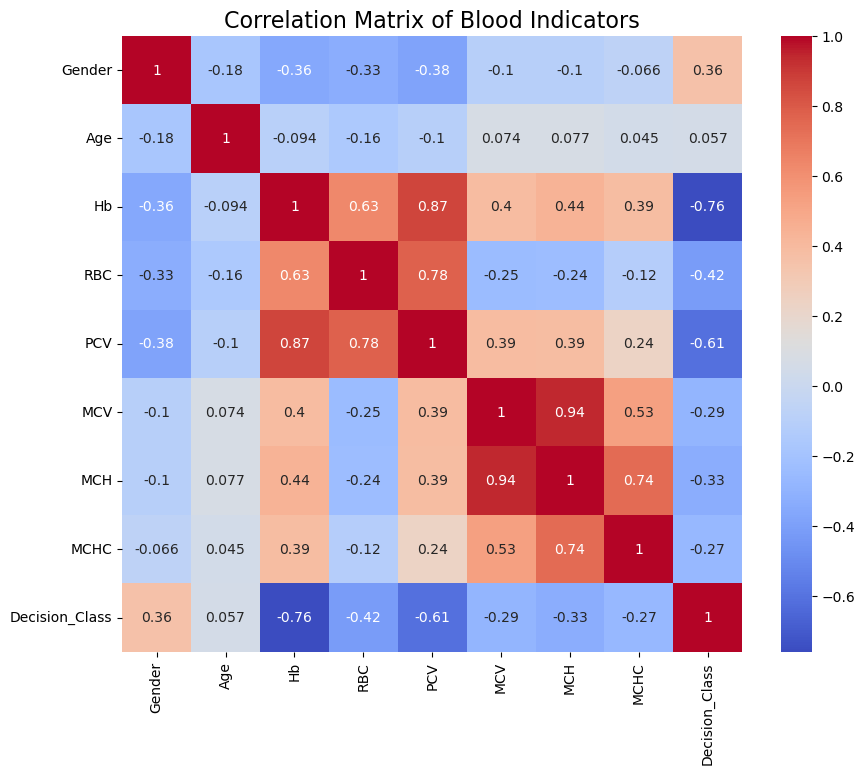

In [104]:
df["Gender"] = df["Gender"].replace({"m": 0, "f": 1})
def visualize_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix of Blood Indicators", fontsize=16)
    plt.show()
visualize_correlation_matrix(df)

Strong Correlations:

- `Hb` and `PCV` are highly correlated, as both measure oxygen-carrying capacity and blood cell concentration.

- `MCV` and `MCH` are strongly related because larger red blood cells (higher MCV) tend to have more hemoglobin (higher MCH).

Moderate Correlations:

- `RBC` and `Hb`: A moderate positive correlation indicates that a higher red blood cell count (RBC) is associated with higher hemoglobin levels, reflecting better oxygen transport.

- `MCHC` and `MCH`: Indicates a relationship between hemoglobin content (MCH) and hemoglobin concentration (MCHC).

Negative Correlations with Decision_Class:

- `Hb` and `Decision_Class`: A strong negative correlation shows that lower hemoglobin is associated with anemia.
- `PCV` and `Decision_Class`: Lower PCV is indicative of anemia.
- `RBC` and `Decision_Class`: Suggests that a lower RBC count contributes to the diagnosis of anemia.

Weak or No Correlation:

- `Gender` and Indicators: Gender has little correlation with most blood indicators, except a mild positive correlation (0.36) with `Decision_Class`, indicating gender differences in anemia prevalence.
- `Age` and Indicators: Age shows negligible correlation with most features, indicating it is not a primary driver of anemia in this dataset.


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

features = ["RBC", "PCV", "Hb", "MCV", "MCH", "MCHC"]
X = df[features]
y = df["Decision_Class"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models for comparison
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[model_name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "Not Available"
    }

# Display results for each model
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("\nClassification Report:\n", metrics["Classification Report"])
    print("\nROC AUC Score:", metrics["ROC AUC"])
    print("-" * 50)

Results for Logistic Regression:
Confusion Matrix:
 [[108   1]
 [  1 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       109
           1       0.99      0.99      0.99       191

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


ROC AUC Score: 0.9993275373456938
--------------------------------------------------
Results for Random Forest:
Confusion Matrix:
 [[109   0]
 [  0 191]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       191

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


ROC AUC Score: 1.0
----------------------------------------------